In [1]:
import numpy as np
import pandas as pd

In [2]:
#x_set is independent variable and y-set is dependent variable
x_set = np.arange(8).reshape(4, 2)
y_set = np.array([0, 0, 1,1])
x_set

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [3]:
y_set

array([0, 0, 1, 1])

# FOR CONTOUR-F PLOT

In [4]:
#Creating Mesh Grid
x1,x2=np.meshgrid(np.arange(x_set[:,0].min()-1,x_set[:,0].max()+1,0.01),
np.arange(x_set[:,1].min()-1,x_set[:,1].max()+1,0.01))

In [5]:
#x1 component of Meshgrid
x1

array([[-1.  , -0.99, -0.98, ...,  6.97,  6.98,  6.99],
       [-1.  , -0.99, -0.98, ...,  6.97,  6.98,  6.99],
       [-1.  , -0.99, -0.98, ...,  6.97,  6.98,  6.99],
       ...,
       [-1.  , -0.99, -0.98, ...,  6.97,  6.98,  6.99],
       [-1.  , -0.99, -0.98, ...,  6.97,  6.98,  6.99],
       [-1.  , -0.99, -0.98, ...,  6.97,  6.98,  6.99]])

In [6]:
#x2 component of Meshgrid
x2

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       ...,
       [7.97, 7.97, 7.97, ..., 7.97, 7.97, 7.97],
       [7.98, 7.98, 7.98, ..., 7.98, 7.98, 7.98],
       [7.99, 7.99, 7.99, ..., 7.99, 7.99, 7.99]])

In [7]:
#Fitting Data set to Regression Module
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_set,y_set)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
x1.ravel()

array([-1.  , -0.99, -0.98, ...,  6.97,  6.98,  6.99])

In [9]:
x2.ravel()

array([0.  , 0.  , 0.  , ..., 7.99, 7.99, 7.99])

In [10]:
#Creation of array, to input into the predict function
q=np.array([x1.ravel(),x2.ravel()])
q

array([[-1.  , -0.99, -0.98, ...,  6.97,  6.98,  6.99],
       [ 0.  ,  0.  ,  0.  , ...,  7.99,  7.99,  7.99]])

In [11]:
#Trasporting similar to independent variable x_set
q.T

array([[-1.  ,  0.  ],
       [-0.99,  0.  ],
       [-0.98,  0.  ],
       ...,
       [ 6.97,  7.99],
       [ 6.98,  7.99],
       [ 6.99,  7.99]])

In [12]:
w=classifier.predict(q.T)
w

array([0, 0, 0, ..., 1, 1, 1])

In [13]:
x1.shape

(800, 800)

In [14]:
#Reshaping the array into 800*800 as x1 (check above)
mat=w.reshape(x1.shape)
mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1]])

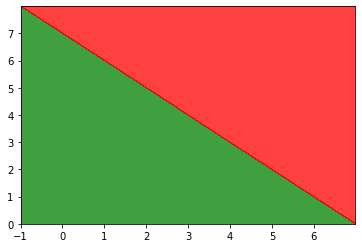

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
clr=ListedColormap(['green','red'])
plt.contourf(x1,x2,mat,cmap=clr,alpha=0.75)

# FOR SCATTER PLOT:

In [16]:
#Below code will split the X data set as per 0 & 1 in Y Set
for i, j in enumerate(np.unique(y_set)):
    print(x_set[y_set == j])
    

[[0 1]
 [2 3]]
[[4 5]
 [6 7]]


In [17]:
#Below code will seperate [0] column from the above data set
for i, j in enumerate(np.unique(y_set)):
    print(x_set[y_set == j,0])

[0 2]
[4 6]


In [18]:
#Below code will seperate [0] & [1] column from teh X data set
#Eg: 0 and 1 in the output([0,2] [1,3]) are the input for scatter plot X and Y

for i, j in enumerate(np.unique(y_set)):
    print(x_set[y_set == j,0],x_set[y_set == j,1])

[0 2] [1 3]
[4 6] [5 7]


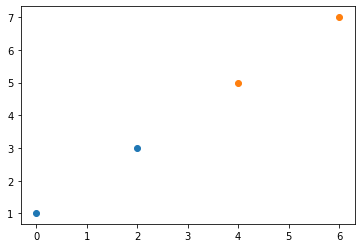

In [19]:
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1])